# Q3

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('face.jpg')[:,:,::-1]

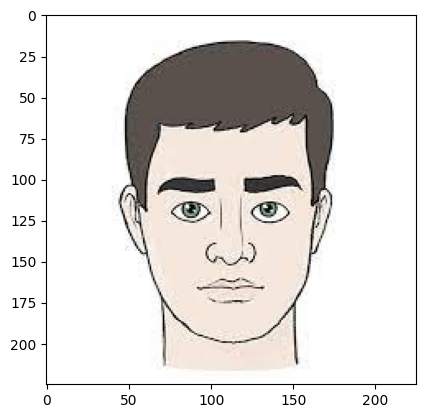

In [3]:
plt.imshow(image)

In [80]:
def segment(image):
    # returned image initializition
    segmented_image = image.copy()

    # define constants
    seed = np.array([40,100])
    visualize_color = np.array([200,10,10])
    threshhold = 65

    # implement dfs
    visited = np.zeros(image.shape[:2])
    queue = np.array([seed])
    visited[seed[0],seed[1]] = 1
    while len(queue) != 0:
        next, queue = queue[-1], queue[:-1]
        segmented_image[next[0], next[1]] = visualize_color
        x, y = next[0], next[1]
        for i in range(-1,2):
            for j in range(-1,2):
                if (visited[x+i,y+j] != 1) and is_same_seg(image[seed[0],seed[1]], image[x+i,y+j],threshhold):
                    head = np.array([[x+i,y+j]])
                    queue = np.concatenate((head, queue))
                    visited[x+i,y+j] = 1
    return segmented_image


def is_same_seg(seed, to_check, threshhold):
    # store differences in 3 channels
    difs = np.zeros(3)
    for i in range(3):
        dif = abs(int(seed[i]) - int(to_check[i]))
        difs[i] = dif

    # check if they're in same segment based on sum 
    if np.sum(difs) < threshhold:
        return True
    return False

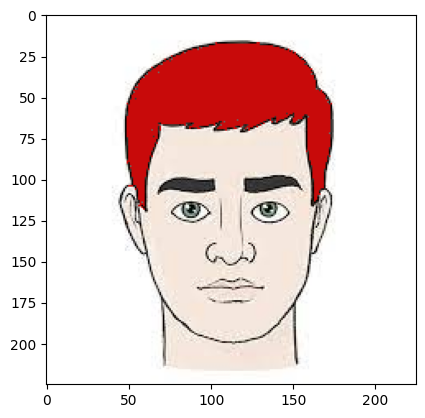

In [79]:
segmented_image = segment(image)
plt.imshow(segmented_image)